# Customer churn prediction

Predicting customer churn is about identifying which customers are at high risk of terminating their accounts. For banks, it is important to identify these customers in order to present them with a new offer, for example. This project is about using various algorithms or neural networks to recognize whether a customer has a high risk of canceling the account.

## Dataset Information

- RowNumber — The row number, has no effect on the output. (Has no effect on customer churn)
- CustomerId — The id of the bank customer, it's a random id. (Has no effect on customer churn)
- Surname — The surname of a customer. (Has no effect on customer churn)
- CreditScore — The amount of the credit of the customer. (Can have an effect on customer churn)
- Geography — The country where the customer lives. (Can have an effect on customer churn)
- Gender — The gender of the customer. (Has no effect on customer churn)
- Age — The age of the customer. (This is certainly relevant on customer churn)
- Tenure — The number of years that the customer has been a client of the bank. (This is certainly relevant on customer churn)
- Balance — The balance of the customer. (Very relevant on customer churn)
- NumOfProducts — The number of products that a customer has purchased. (Relevant on customer churn)
- HasCrCard — Has a customer a credit card or not.
- IsActiveMember — Active customers.
- EstimatedSalary — The salary of the customer.
- Exited — Whether or not the customer left the bank. (Label)

### Import of the required libraries

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.preprocessing import StandardScaler, OneHotEncoder 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix

from imblearn.over_sampling import RandomOverSampler

from collections import Counter

from tensorflow import keras

### Load the data and display the 5 first rows

In [3]:
data = pd.read_csv("./data/churn.csv")

## Data Analysis

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.shape

(10000, 14)

In [6]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
len(data[data.duplicated()])

0

### Remove columns that are not used for the analysis

In [11]:
data_distplot = data[["CreditScore", "Balance", "EstimatedSalary"]]

### Plot the distrbution and the correlation of th numeric values

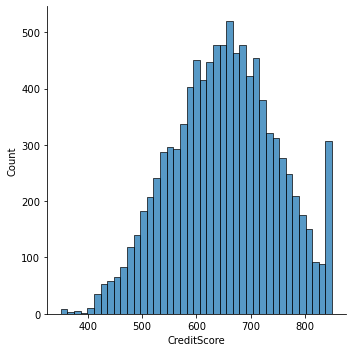

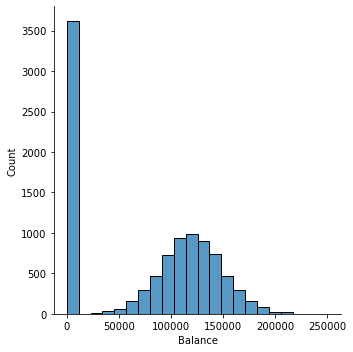

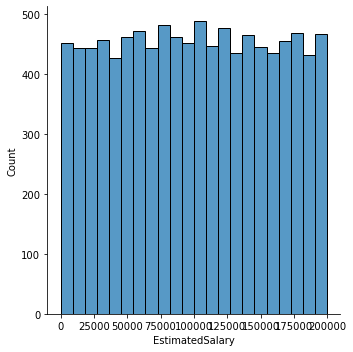

In [12]:
for colmun in data_distplot.columns:
    sns.displot(data_distplot[colmun])

plt.show()

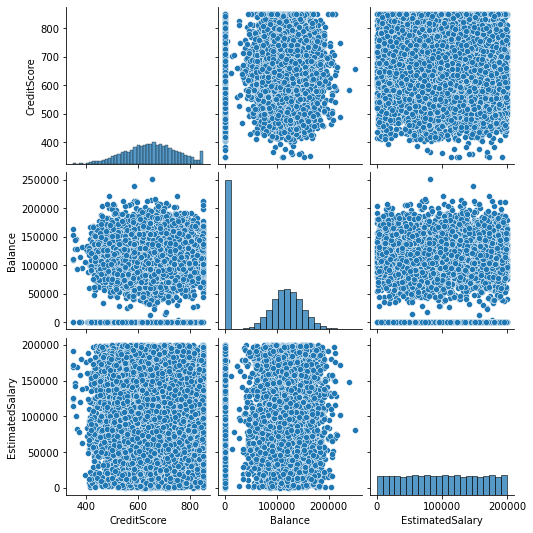

In [13]:
sns.pairplot(data_distplot)
plt.show()

### Checking the balance of the exited label

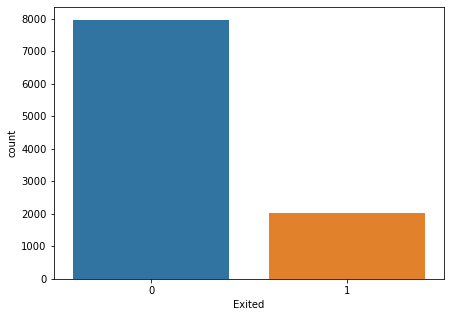

In [14]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Exited")
plt.show()

### Check the balance of the gender feature

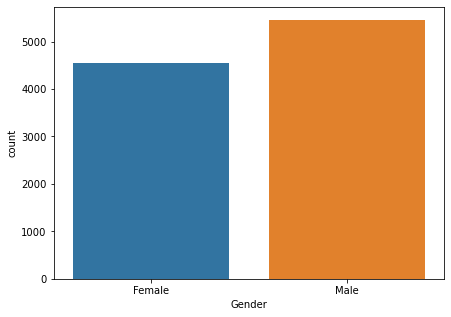

In [15]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Gender")
plt.show()

### Check the balance of the geography feature

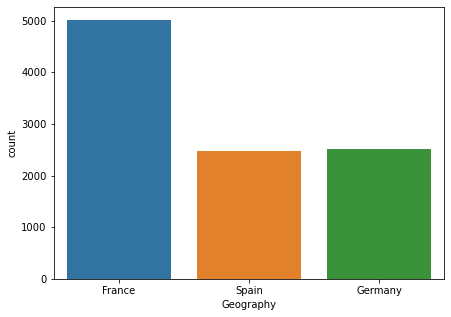

In [16]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="Geography")
plt.show()

### Check te balance of the HasCrCard feature

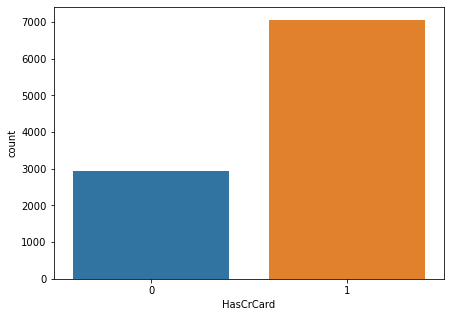

In [17]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="HasCrCard")
plt.show()

### Check the balance of the IsActiveMember feature

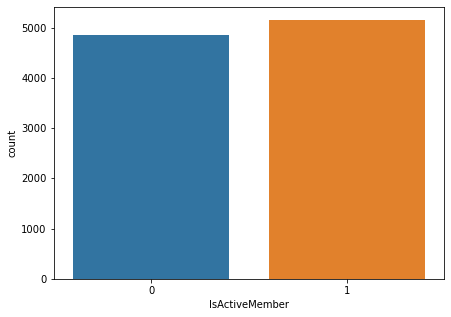

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(data=data, x="IsActiveMember")
plt.show()

### Check correlation between independent variables

In [19]:
data_correlation = data.drop(["RowNumber", "CustomerId", "Exited"], axis=1)
data_correlation.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000


### Check correlation between the dependet and independet variable

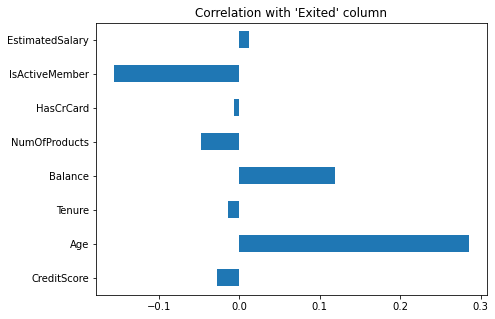

In [20]:
plt.figure(figsize=(7, 5))
data_correlation.corrwith(data["Exited"]).plot(kind="barh", title="Correlation with 'Exited' column")
plt.show()

## Feature engineering

### Remove unused columns

In [21]:
data_prepared = data.drop(["RowNumber", "CustomerId", "Surname", "Exited"], axis=1)
y = data["Exited"]

data_prepared

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


### Create pipeline for scalling and one-hot encoding

In [22]:
scaler_pipeline = Pipeline([
    ("scaler", StandardScaler())
])

In [23]:
onehot_pipeline = Pipeline([ 
    ("onehot", OneHotEncoder())
])

In [24]:
full_transformer = ColumnTransformer([
    ("pass", "passthrough", ["Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember"]),
    ("scaler", scaler_pipeline, ["Age", "CreditScore", "Balance", "EstimatedSalary"]),
    ("onehot", onehot_pipeline, ["Geography", "Gender"])
])

In [25]:
onehot_transformer = ColumnTransformer([
    ("pass", "passthrough", ["Age", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "CreditScore", "Balance", "EstimatedSalary"]),
    ("onehot", onehot_pipeline, ["Geography", "Gender"])
])

### The last 500 records are for the validation set

In [26]:
data_final = data_prepared[:9500]
y_final = y[:9500]
 
data_validation = data_prepared[9500:]
y_validation = y[9500:]

In [27]:
data_final.shape

(9500, 10)

In [28]:
data_validation.shape

(500, 10)

### Splitting the dataset in data and label

In [29]:
X_train, X_test, y_train, y_test = train_test_split(data_final, y_final, test_size=0.2, shuffle=True, random_state=42)

### Oversampling the minority class
We need to do an oversampling because the exited class is underrepresented

In [30]:
Counter(y_train)

Counter({0: 6055, 1: 1545})

In [31]:
oversampler = RandomOverSampler(random_state=42, sampling_strategy="auto")
X_train_resample, y_train_resample = oversampler.fit_resample(X_train, y_train)

print(Counter(y_train_resample))
print(X_train_resample.shape)
print(y_train_resample.shape)

Counter({0: 6055, 1: 6055})
(12110, 10)
(12110,)


## Model selection

### Model train

### Scalling and one hot encoding

In [32]:
X_train_onehot_scaled = full_transformer.fit_transform(X_train_resample)
X_test_onehot_scaled = full_transformer.fit_transform(X_test)

print(X_train_onehot_scaled.shape)
print(X_test_onehot_scaled.shape)

(12110, 13)
(1900, 13)


### Model train

In [33]:
model_selection_pipeline = [
    ("Logistic Regression", LogisticRegression(max_iter=500)),
    ("Support Vector Classifier", SVC()),
    ("K-Neighbors Classifier", KNeighborsClassifier()),
    ("Naive Bayes Classifier", GaussianNB())
]

model_result = []
for model_name, model in model_selection_pipeline:
    model_result.append((model_name, model.fit(X_train_onehot_scaled, y_train_resample)))

### Model predict

In [34]:
for model_name, model in model_result:
    y_pred = model.predict(X_test_onehot_scaled)
    print(f"Classification Report for {model_name}")
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.65      0.76      1495
           1       0.37      0.74      0.49       405

    accuracy                           0.67      1900
   macro avg       0.64      0.70      0.63      1900
weighted avg       0.79      0.67      0.70      1900

Classification Report for Support Vector Classifier
              precision    recall  f1-score   support

           0       0.92      0.74      0.82      1495
           1       0.44      0.75      0.56       405

    accuracy                           0.74      1900
   macro avg       0.68      0.75      0.69      1900
weighted avg       0.82      0.74      0.76      1900

Classification Report for K-Neighbors Classifier
              precision    recall  f1-score   support

           0       0.89      0.74      0.80      1495
           1       0.40      0.66      0.50       405

    accuracy                       

### Decision Tree Classifier

In [35]:
X_train_onehot = onehot_transformer.fit_transform(X_train_resample)
X_test_onehot = onehot_transformer.fit_transform(X_test)

print(X_train_onehot.shape)
print(X_test_onehot.shape)

(12110, 13)
(1900, 13)


In [36]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_onehot, y_train_resample)

DecisionTreeClassifier()

In [37]:
y_pred_dt = decision_tree.predict(X_test_onehot)
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1495
           1       0.45      0.42      0.43       405

    accuracy                           0.77      1900
   macro avg       0.65      0.64      0.64      1900
weighted avg       0.76      0.77      0.76      1900



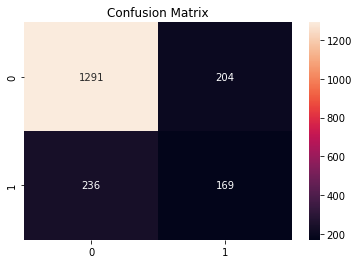

In [38]:
con_matrix = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### Evaluate on validation set

In [39]:
X_validation_onehot = onehot_transformer.fit_transform(data_validation)
X_validation_onehot.shape

(500, 13)

In [40]:
y_pred_validation_dt = decision_tree.predict(X_validation_onehot)
print(classification_report(y_validation, y_pred_validation_dt))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       413
           1       0.42      0.45      0.43        87

    accuracy                           0.80       500
   macro avg       0.65      0.66      0.65       500
weighted avg       0.80      0.80      0.80       500



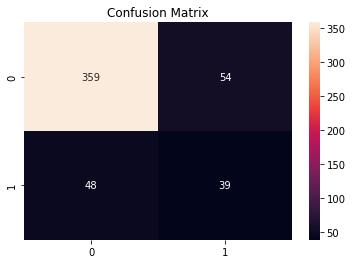

In [41]:
con_matrix = confusion_matrix(y_validation, y_pred_validation_dt)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### Random Forest Classifier

In [42]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_onehot, y_train_resample)

RandomForestClassifier(random_state=42)

In [43]:
y_pred_rf = random_forest.predict(X_test_onehot)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      1495
           1       0.71      0.51      0.60       405

    accuracy                           0.85      1900
   macro avg       0.79      0.73      0.75      1900
weighted avg       0.84      0.85      0.84      1900



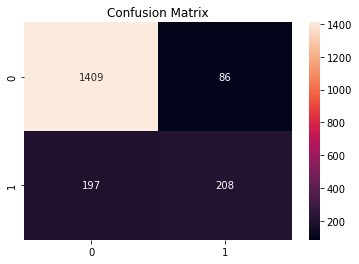

In [44]:
con_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [45]:
y_pred_validation_rf = random_forest.predict(X_validation_onehot)
print(classification_report(y_validation, y_pred_validation_rf))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       413
           1       0.66      0.45      0.53        87

    accuracy                           0.86       500
   macro avg       0.78      0.70      0.73       500
weighted avg       0.85      0.86      0.85       500



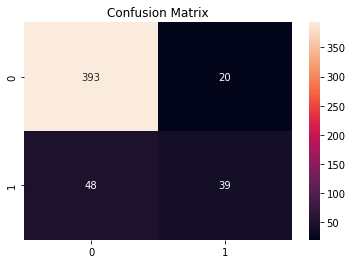

In [46]:
con_matrix = confusion_matrix(y_validation, y_pred_validation_rf)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### Random Forest with Grid Search

In [47]:
param_grid = {
    "n_estimators": [200, 300, 500, 800],
    "max_features": ["auto", "sqrt", "log2"],
    "max_depth" : [4, 5, 6, 7, 8, 10, 15],
    "criterion" :["gini", "entropy"]
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5)
grid_search_rf.fit(X_train_onehot, y_train_resample)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300, 500, 800]})

In [48]:
grid_search_rf.best_params_

{'criterion': 'gini',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 800}

In [49]:
random_forest = RandomForestClassifier(criterion="gini", max_depth=15, max_features="auto", n_estimators=800, random_state=42)
random_forest.fit(X_train_onehot, y_train_resample)

RandomForestClassifier(max_depth=15, n_estimators=800, random_state=42)

In [50]:
y_pred_rf = random_forest.predict(X_test_onehot)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1495
           1       0.65      0.54      0.59       405

    accuracy                           0.84      1900
   macro avg       0.77      0.73      0.75      1900
weighted avg       0.83      0.84      0.83      1900



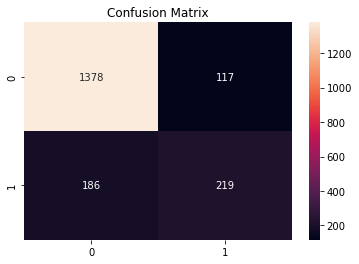

In [51]:
con_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

In [52]:
y_pred_validation_rf = random_forest.predict(X_validation_onehot)
print(classification_report(y_validation, y_pred_validation_rf))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       413
           1       0.61      0.55      0.58        87

    accuracy                           0.86       500
   macro avg       0.76      0.74      0.75       500
weighted avg       0.86      0.86      0.86       500



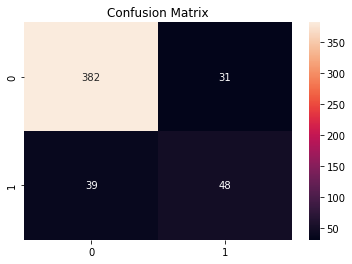

In [53]:
con_matrix = confusion_matrix(y_validation, y_pred_validation_rf)
sns.heatmap(con_matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

### Explain the Random Forest Model

In [91]:
explainer = shap.TreeExplainer(random_forest)

In [97]:
X_explain = pd.DataFrame(X_train_onehot, columns=["Age", "Tenure", "NumOfProducts", "HasCrCard", "IsActiveMember", "CreditScore", "Balance", "EstimatedSalary", "Gender_Female", "Gender_Male", "Geography_Spain", "Geography_France", "Geography_Germany"])
X_explain.head()

,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,CreditScore,Balance,EstimatedSalary,Gender_Female,Gender_Male,Geography_Spain,Geography_France,Geography_Germany
0,70.0,3.0,2.0,1.0,1.0,792.0,0.00,172240.27,1.0,0.0,0.0,1.0,0.0
1,47.0,0.0,2.0,0.0,1.0,708.0,126589.12,132730.07,1.0,0.0,0.0,1.0,0.0
2,42.0,10.0,2.0,1.0,1.0,707.0,0.00,152944.39,1.0,0.0,0.0,1.0,0.0
3,28.0,3.0,2.0,1.0,0.0,619.0,0.00,53394.12,1.0,0.0,0.0,1.0,0.0
4,44.0,10.0,1.0,1.0,0.0,591.0,113581.98,1985.41,0.0,1.0,0.0,1.0,0.0


In [98]:
shap_values = explainer.shap_values(X_explain)

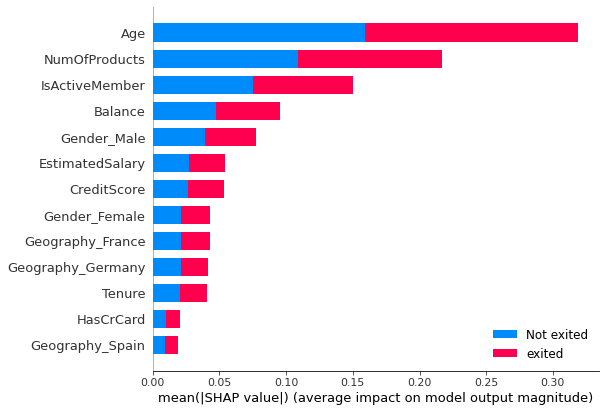

In [110]:
shap.summary_plot(shap_values, X_explain, class_names=["Not exited", "exited"], plot_type="bar")

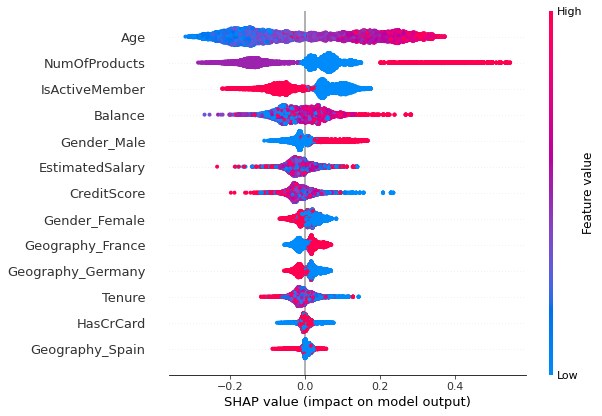

In [111]:
shap.summary_plot(shap_values[1], X_explain.values, feature_names=X_explain.columns)

## Prediction with Neuronal Network

In [241]:
nn_model = keras.models.Sequential([
    keras.layers.Input(shape=X_train_onehot_scaled[-1].shape),
    keras.layers.Dense(256, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(128, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(64, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(32, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(16, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(8, activation="relu",
                        kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(1, activation="sigmoid",
                        kernel_regularizer=keras.regularizers.l2(0.01))
])

In [242]:
nn_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001), 
    loss="binary_crossentropy", 
    metrics=["accuracy"])

In [243]:
history = nn_model.fit(X_train_onehot_scaled, y_train_resample, validation_data=(X_test_onehot_scaled, y_test), epochs=15)

Epoch 1/15
379/379 [==============================] - 2s 2ms/step - loss: 1.2269 - accuracy: 0.6878 - val_loss: 0.7742 - val_accuracy: 0.6432
Epoch 2/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6959 - accuracy: 0.7048 - val_loss: 0.6591 - val_accuracy: 0.7447
Epoch 3/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6777 - accuracy: 0.7073 - val_loss: 0.6919 - val_accuracy: 0.6942
Epoch 4/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6701 - accuracy: 0.7098 - val_loss: 0.8982 - val_accuracy: 0.4689
Epoch 5/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6664 - accuracy: 0.7077 - val_loss: 0.6396 - val_accuracy: 0.7484
Epoch 6/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6608 - accuracy: 0.7145 - val_loss: 0.6493 - val_accuracy: 0.7342
Epoch 7/15
379/379 [==============================] - 1s 2ms/step - loss: 0.6598 - accuracy: 0.7113 - val_loss: 0.6861 - val_accuracy: 0.6932
Epoch 

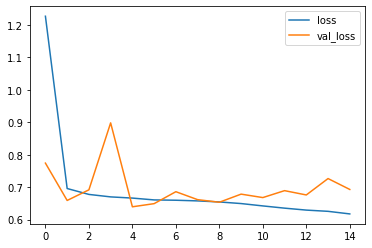

In [244]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

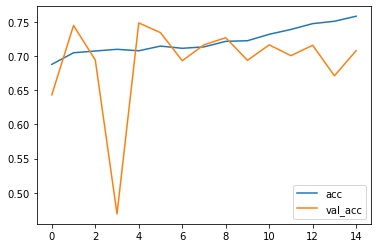

In [245]:
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()